length is 10.000019047078773
Done


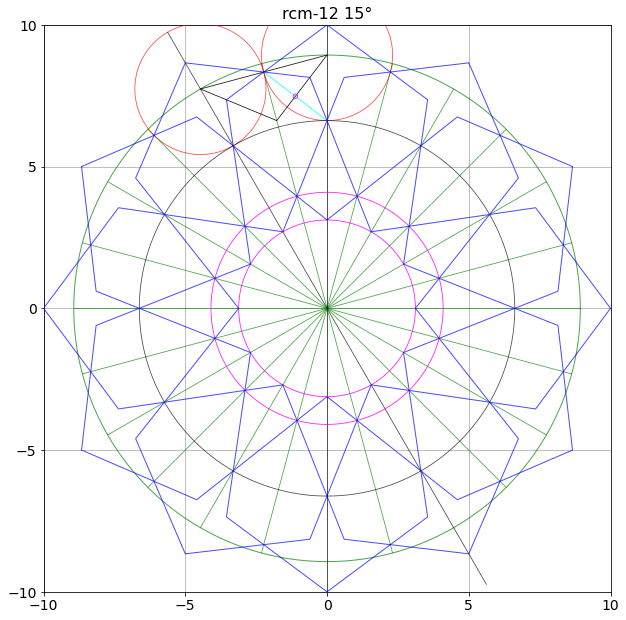

In [1]:
# new-rcm-12-2
# 2021-11-05
#
# python 3.8.2
# run on https://repl.it
#
# inspired by:
# Ayman Soliman [@FB/Analysis of the islamic geometric designs]
#
# pdf : The Geometric Rosette : analysis of an Islamic decorative motif
#
# 要執行本程式, 請按上方run▶
#
# to fix matplotlib warning
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
import numpy as np
# 載入繪圖模組 pyplot, 重新命名為 plot
import matplotlib.pyplot as plt
#
from shapely import affinity
from shapely.geometry  import LineString, Point
#
# ---------------------------------------------
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.0   # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
def shapely_Arc(cxy, r, start_angle, end_angle) :

    numsegments = 1000
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
#
# end of def
#
def motif_line(LS, MYcolor, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    ax.plot(xs, ys, color=MYcolor, alpha=0.7, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
#
def motif_fill(LS, color, ZORDER) :
    #
    xs, ys = LS.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
# ------------------------------------------------------------------------------------------------
#
# tup7 is type of Tuple, have 7 indexed value
#
tup7 = set_graphic_area(2*10, 2*10)  
fig = plt.figure(figsize=(tup7[0], tup7[1])) # 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
ax = fig.add_subplot(1,1,1)   # 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(-tup7[6]/2, tup7[6]/2)    # 設定X軸的顯示範圍, from xmin to xmax
plt.ylim(-tup7[6]/2, tup7[6]/2)    # 設定Y軸的顯示範圍, from ymin to ymax
#
xvalues = [-10,-5,0,5,10]
yvalues = [-10,-5,0,5,10]
plt.xticks(xvalues)
plt.yticks(yvalues)
plt.tick_params(labelsize=14)
#
plt.grid(True)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
# get current axes, set X,Y same ratio & scale  
plt.gca().set_aspect('equal', adjustable='box')
#
r0  = 8.9354
cxy = (0,0)
cir_0 = shapely_Arc(cxy, r0, 0, 360)
xs, ys = cir_0.xy
ax.plot(xs, ys, alpha=0.7, color='green', linewidth=1.0, solid_capstyle='round', zorder=10)
#
Hline = LineString([(-r0,0), (r0,0)])
for degree in (0,15,30,45,60,75,105,135,150,165) :
    r_Hline = affinity.rotate(Hline, degree, cxy)
    xs, ys = r_Hline.xy
    ax.plot(xs, ys, alpha=0.7, color='green', linewidth=0.8, solid_capstyle='round', zorder=10)
# end for
#
point_1_xy = (r0,0)
point_2_xy = (r0*np.cos(5*np.pi/12), r0*np.sin(5*np.pi/12))
point_3_xy = (r0*np.cos(7*np.pi/12), r0*np.sin(7*np.pi/12))
point_1    = Point(point_1_xy)
point_2    = Point(point_2_xy)
point_3    = Point(point_3_xy)
d1 = point_2.distance(point_3) / 2
d2 = r0 - d1
#
for j in (5, 7) :
    degree = j * 15
    that_point = affinity.rotate(point_1, degree, cxy)
    that_point_xy = (that_point.x, that_point.y)
    that_cir = shapely_Arc(that_point_xy, d1, 0, 360)
    r15_that_cir = affinity.rotate(that_cir, 15, cxy)
    xs, ys = r15_that_cir.xy
    ax.plot(xs, ys, alpha=0.7, color='red', linewidth=0.8, solid_capstyle='round', zorder=10)
# for
#
Hline = LineString([(r0+d1,0), (-r0-d1,0)])
line_left  = affinity.rotate(Hline,105, cxy)
line_right = affinity.rotate(Hline, 75, cxy)
r15_line_left  = affinity.rotate(line_left,  15, cxy)
r15_line_right = affinity.rotate(line_right, 15, cxy)
#
xs, ys = r15_line_left.xy
ax.plot(xs, ys, alpha=0.7, color='black', linewidth=0.8, solid_capstyle='round', zorder=10)
#
xs, ys = r15_line_right.xy
ax.plot(xs, ys, alpha=0.7, color='black', linewidth=0.8, solid_capstyle='round', zorder=10)
#
cir_2 = shapely_Arc(cxy, d2, 0, 360)
xs, ys = cir_2.xy
ax.plot(xs, ys, alpha=0.7, color='black', linewidth=0.8, solid_capstyle='round', zorder=10)
#
line_p2_p3 = LineString([point_2_xy, point_3_xy])
r15_line_p2_p3 = affinity.rotate(line_p2_p3, 15, cxy)
xs, ys = r15_line_p2_p3.xy
ax.plot(xs, ys, alpha=0.9, color='black', linewidth=0.8, solid_capstyle='round', zorder=10)
#
bisector_degree = (90-15)/2
mid_1 = line_p2_p3.interpolate(0.5, normalized = True)
mid_2 = affinity.rotate(mid_1, 90-15, point_2_xy)
mid_1_xy = (mid_1.x, mid_1.y)
mid_2_xy = (mid_2.x, mid_2.y)
line_mid_1_to_2 = LineString([mid_1_xy, mid_2_xy])
#
line_A = affinity.rotate(line_p2_p3, bisector_degree, point_2_xy)
line_B = affinity.rotate(line_p2_p3,-bisector_degree, point_3_xy)
its_1    = line_A.intersection(line_B)
its_1_xy = (its_1.x, its_1.y)
line_a   = LineString([point_2_xy, its_1_xy])
line_b   = LineString([point_3_xy, its_1_xy])
#
its_2 = line_a.intersection(line_mid_1_to_2)
its_2_xy = (its_2.x, its_2.y)
#
key_cir = shapely_Arc(its_2_xy, 0.08, 0, 360)
r15_key_cir = affinity.rotate(key_cir, 15, cxy)
xs, ys = r15_key_cir.xy
ax.plot(xs, ys, alpha=0.9, color='magenta', linewidth=0.8, solid_capstyle='round', zorder=15)
#
r15_key_line_mid_1_to_2 = affinity.rotate(line_mid_1_to_2, 15, cxy)
xs, ys = r15_key_line_mid_1_to_2.xy
ax.plot(xs, ys, alpha=0.9, color='cyan', linewidth=0.8, solid_capstyle='round', zorder=10)
#
r15_line_a = affinity.rotate(line_a, 15, cxy)
r15_line_b = affinity.rotate(line_b, 15, cxy)
#
xs, ys = r15_line_a.xy
ax.plot(xs, ys, alpha=0.9, color='black', linewidth=0.8, solid_capstyle='round', zorder=10)
#
xs, ys = r15_line_b.xy
ax.plot(xs, ys, alpha=0.9, color='black', linewidth=0.8, solid_capstyle='round', zorder=10)
#
tmp_1_xy = (mid_2.x, point_2_xy[1])
tmp_2_xy = (mid_2.x, 0)
line_tmp = LineString([tmp_1_xy, tmp_2_xy])
its_3    = line_a.intersection(line_tmp)
its_3_xy = (its_3.x, its_3.y)
#
line_base = LineString([its_2_xy, its_3_xy])
d_its2_to_its3 = its_2.distance(its_3)
distance = d_its2_to_its3 - 0.24
#
key_posi = line_base.interpolate(distance)
key_posi_xy = (key_posi.x, key_posi.y)
key_cir_2 = shapely_Arc(key_posi_xy, 0.07, 0, 360)
#
t0x = mid_2.x - key_posi.x
t0y = mid_2.y - key_posi.y
ext_0 = affinity.translate(mid_2, 10*t0x, 10*t0y, 0)
line_mid_2_to_ext_0 = LineString([mid_2_xy, (ext_0.x,ext_0.y)])
ext_p0 = line_mid_2_to_ext_0.intersection(Hline)
ext_p0_xy = (ext_p0.x, ext_p0.y)
#
line_key = LineString([mid_1_xy, key_posi_xy, mid_2_xy, ext_p0_xy])
#
hline = LineString([(r0,0), (0,0)])
r45_Hline = affinity.rotate(hline, 45, cxy)
r60_Hline = affinity.rotate(hline, 60, cxy)
#
its_4 = line_key.intersection(r45_Hline)
its_5 = line_key.intersection(r60_Hline)
its_4_xy = (its_4.x, its_4.y)
its_5_xy = (its_5.x, its_5.y)
d4 = its_4.distance(Point(cxy))
d5 = its_5.distance(Point(cxy))
#
cir_4 = shapely_Arc(cxy, d4, 0, 360) # small magenta circle
cir_5 = shapely_Arc(cxy, d5, 0, 360) # big   magenta circle
#
xs, ys = cir_4.xy
ax.plot(xs, ys, alpha=0.9, color='magenta', linewidth=0.8, solid_capstyle='round', zorder=15)
#
xs, ys = cir_5.xy
ax.plot(xs, ys, alpha=0.9, color='magenta', linewidth=0.8, solid_capstyle='round', zorder=15)
#
its_51    = line_key.intersection(cir_4)
its_51_xy = (its_51.x, its_51.y)
key_1_xy = [its_51_xy, mid_2_xy, key_posi_xy, mid_1_xy ]
key_2_xy = [(-key_posi_xy[0],key_posi_xy[1]), (-mid_2_xy[0],mid_2_xy[1]), (-its_51_xy[0],its_51_xy[1])]
line_key_xy = key_1_xy + key_2_xy
line_key    = LineString(line_key_xy)
#
tx = mid_1.x - key_posi.x
ty = mid_1.y - key_posi.y
ext_1 = affinity.translate(mid_1, 3*tx, 3*ty, 0)
line_mid_1_to_ext_1 = LineString([mid_1_xy, (ext_1.x,ext_1.y)])
ext_p1 = line_mid_1_to_ext_1.intersection(line_left)
ext_p1_xy = ( ext_p1.x, ext_p1.y)
ext_p2_xy = (-ext_p1.x, ext_p1.y)
print('length is', ext_p1.distance(Point(0,0)))
up_motif = LineString([ext_p1_xy, mid_1_xy, ext_p2_xy])
#
for i in range(0,12) :
    r_line_key = affinity.rotate(line_key, i*30+15, cxy)
    xs, ys = r_line_key.xy
    ax.plot(xs, ys, alpha=0.7, color='blue', linewidth=1.0, solid_capstyle='round', zorder=15)
    #
    r_up_motif = affinity.rotate(up_motif, i*30+15, cxy)
    xs, ys = r_up_motif.xy
    ax.plot(xs, ys, alpha=0.7, color='blue', linewidth=1.0, solid_capstyle='round', zorder=15)
# end for
#
ax.set_title('rcm-12 15°', fontsize=16)
plt.savefig("./png5/rcm-12-8.png",format="png",dpi=150)
#
print ('Done')